# Doubling

In [5]:
import numpy as np
import ducc0
lmax = 3
ntheta = (ducc0.fft.good_size(lmax + 2) + 3) // 4 * 4
nphi = ducc0.fft.good_size(lmax + 1)*2
print(ntheta, nphi)
synth1D = np.arange((ntheta * nphi))
doubling1D_py = np.zeros((2 * ntheta-2, nphi))
print(doubling1D_py.flatten().shape)
synth1D_py = np.copy(synth1D.reshape(ntheta, nphi))
print(synth1D_py.shape, doubling1D_py[:ntheta, :].shape)

nphihalf = nphi//2
doubling1D_py[:ntheta, :] = synth1D_py
doubling1D_py[ntheta:, :nphihalf] = doubling1D_py[ntheta-2:0:-1, nphihalf:]
doubling1D_py[ntheta:, nphihalf:] = doubling1D_py[ntheta-2:0:-1, :nphihalf]

# doubling1D_py

8 8
(112,)
(8, 8) (8, 8)


8 8 14


array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20., 21., 22., 23.],
       [24., 25., 26., 27., 28., 29., 30., 31.],
       [32., 33., 34., 35., 36., 37., 38., 39.],
       [40., 41., 42., 43., 44., 45., 46., 47.],
       [48., 49., 50., 51., 52., 53., 54., 55.],
       [56., 57., 58., 59., 60., 61., 62., 63.],
       [52., 53., 54., 55., 48., 49., 50., 51.],
       [44., 45., 46., 47., 40., 41., 42., 43.],
       [36., 37., 38., 39., 32., 33., 34., 35.],
       [28., 29., 30., 31., 24., 25., 26., 27.],
       [20., 21., 22., 23., 16., 17., 18., 19.],
       [12., 13., 14., 15.,  8.,  9., 10., 11.]])

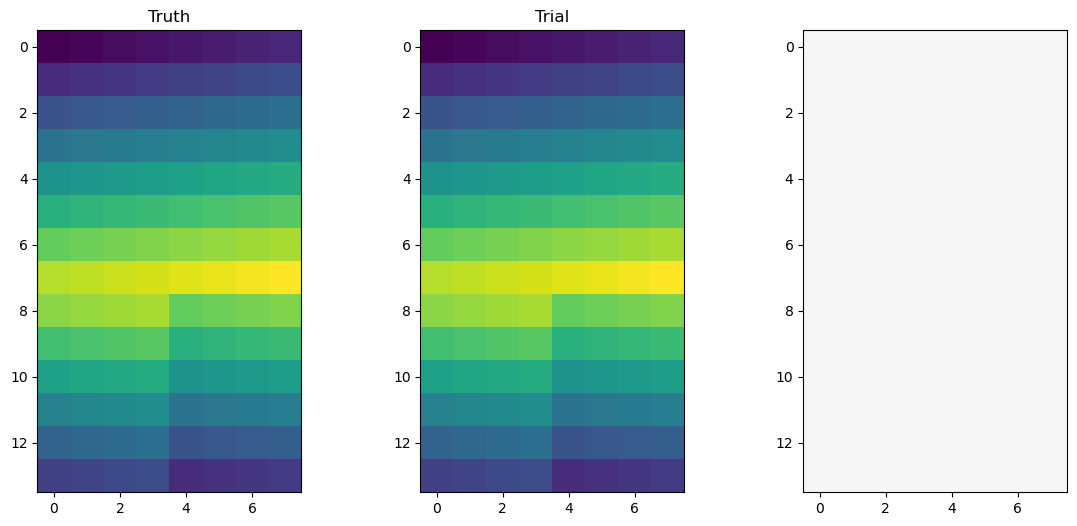

In [6]:
import numpy as np
synth1D = np.arange((ntheta * nphi))
doubling1D = np.zeros(((2 * ntheta - 2)* nphi))
import matplotlib.pyplot as plt
nphihalf = nphi // 2
npixplusnphihalf = (ntheta-2)*nphi + nphihalf

print(ntheta, nphi, 2*ntheta-2)
for ringi in range(2 * ntheta-2):
    if (ringi < ntheta):
        for phii in range(nphi):
            doubling1D[ringi * nphi + phii] = synth1D[ringi * nphi + phii]
    elif (ringi >= ntheta):
        for phii in range(0, nphi):
            if phii<nphihalf:
                # bottom left
                doubling1D[ringi * nphi + phii] = synth1D[npixplusnphihalf - (ringi)*nphi + phii]
            else:
                # bottom right
                doubling1D[ringi * nphi + phii] = synth1D[npixplusnphihalf - (ringi+1)*nphi + phii]

fig, ax = plt.subplots(1,3,figsize=(14,6))
ax[0].imshow(doubling1D_py)
ax[0].set_title('Truth')
ax[1].imshow(doubling1D.reshape(2*ntheta - 2, nphi))
ax[1].set_title("Trial")
ax[2].imshow(doubling1D_py-doubling1D.reshape(2*ntheta - 2, nphi), cmap="PiYG", vmin=-10, vmax=10)

(doubling1D_py) - (doubling1D.reshape(2*ntheta - 2, nphi))
# doubling1D.reshape(2*ntheta - 2, nphi)
doubling1D_py

## theta-contiguous array

12 8
[ 0 12 24 36 48 60 72 84  1 13 25 37 49 61 73 85  2 14 26 38 50 62 74 86
  3 15 27 39 51 63 75 87  4 16 28 40 52 64 76 88  5 17 29 41 53 65 77 89
  6 18 30 42 54 66 78 90  7 19 31 43 55 67 79 91  8 20 32 44 56 68 80 92
  9 21 33 45 57 69 81 93 10 22 34 46 58 70 82 94 11 23 35 47 59 71 83 95]

[ 0 12 24 36 48 60 72 84  0  0  0  0  0  0  1 13 25 37 49 61 73 85  0  0
  0  0  0  0  2 14 26 38 50 62 74 86  0  0  0  0  0  0  3 15 27 39 51 63
 75 87  0  0  0  0  0  0  4 16 28 40 52 64 76 88  0  0  0  0  0  0  5 17
 29 41 53 65 77 89  0  0  0  0  0  0  6 18 30 42 54 66 78 90 72 60 48 36
 24 12  7 19 31 43 55 67 79 91 73 61 49 37 25 13  8 20 32 44 56 68 80 92
 74 62 50 38 26 14  9 21 33 45 57 69 81 93 75 63 51 39 27 15 10 22 34 46
 58 70 82 94 76 64 52 40 28 16 11 23 35 47 59 71 83 95 77 65 53 41 29 17]
[ 0 12 24 36 48 60 72 84  0  0  0  0  0  0  1 13 25 37 49 61 73 85  0  0
  0  0  0  0  2 14 26 38 50 62 74 86  0  0  0  0  0  0  3 15 27 39 51 63
 75 87  0  0  0  0  0  0  4 16 28 40 52 64 

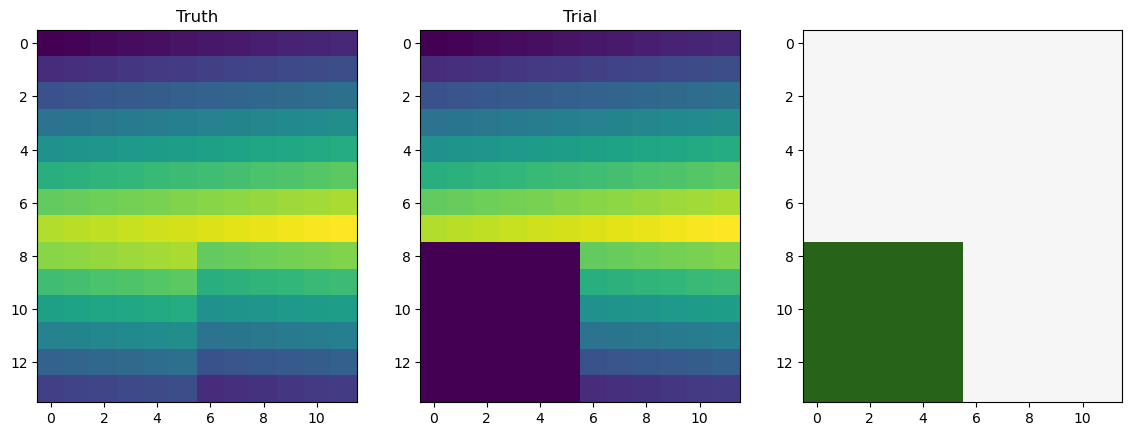

In [9]:
import numpy as np
synth1D = np.arange((ntheta * nphi)).reshape(ntheta, nphi).T.flatten()
print(nphi, ntheta)
print(synth1D)
print()
doubling1D = np.zeros(((2 * ntheta - 2)* nphi))
import matplotlib.pyplot as plt
nphihalf = nphi // 2
npix = ntheta * nphi
dtheta = 2 * ntheta-2

for phii in range(nphi):
    # print(phii)
    for ringi in range(2 * ntheta-2):
        if (ringi < ntheta):
            doubling1D[phii * (2*ntheta-2) + ringi] = synth1D[phii * ntheta + ringi]
        else:
            if phii<nphihalf: #bottom left
                widx = phii * (2*ntheta-2) + ringi
                # base = ntheta*(nphi//2)+ntheta + phii * ntheta - 2
                # add = (ntheta-ringi)
                # ridx = base + add
                # print("idx {} -> idx {}, synth1D[{}] = {}, base: {}, add: {}".format(widx, ridx,  ridx, synth1D[ridx], base, add))
                doubling1D[phii * (2*ntheta-2) + ringi] = synth1D[ntheta*(nphi//2)+ntheta + phii * ntheta - 2 + (ntheta-ringi)]
            else: # bottom right
                widx = phii * (2*ntheta-2) + ringi
                # base = (phii-nphihalf) * ntheta + ntheta - 2 + (ntheta-ringi)
                # add = (ntheta-ringi)
                # ridx = base + add
                # print("idx {} -> idx {}, synth1D[{}] = {}, base: {}, add: {}".format(widx, ridx,  ridx, synth1D[ridx], base, add))
                doubling1D[widx] = synth1D[(phii-nphihalf) * ntheta + ntheta - 2 + (ntheta-ringi)]
    # print(s)
print(doubling1D.flatten().astype(int))
fig, ax = plt.subplots(1,3,figsize=(14,6))
ax[0].imshow(doubling1D_py)
ax[0].set_title('Truth')
ax[1].imshow(doubling1D.reshape(nphi, 2*ntheta - 2).T)
ax[1].set_title("Trial")
ax[2].imshow(doubling1D_py-doubling1D.reshape(nphi, 2*ntheta - 2).T, cmap="PiYG", vmin=-10, vmax=10)

# (doubling1D_py) - (doubling1D.reshape(nphi, 2*ntheta - 2).T)
# doubling1D.reshape(2*ntheta - 2, nphi)
# print(doubling1D_py.T.flatten().astype(int))
print(doubling1D.flatten().astype(int))
# print(synth1D.flatten())

# adjoint doubling

In [2]:
import numpy as np
import ducc0
lmax = 5
ntheta = (ducc0.fft.good_size(lmax + 2) + 3) // 4 * 4
nphi = ducc0.fft.good_size(lmax + 1) * 2
synth1D = np.arange((ntheta * nphi)).reshape(nphi,-1).T.flatten()
doubling1D_py = np.zeros((2 * ntheta-2, nphi))
synth1D_py = np.copy(synth1D.reshape(ntheta, nphi))

nphihalf = nphi//2
doubling1D_py[:ntheta, :] = synth1D_py
doubling1D_py[ntheta:, :nphihalf] = doubling1D_py[ntheta-2:0:-1, nphihalf:]
doubling1D_py[ntheta:, nphihalf:] = doubling1D_py[ntheta-2:0:-1, :nphihalf]

# doubling1D_py

In [3]:
d1D_py = np.copy(doubling1D_py)
d1D_py[1:ntheta - 1, :nphihalf] += d1D_py[-1:ntheta - 1:-1, nphihalf:]#d1D_py[-1:ntheta - 1:-1, nphihalf:]
d1D_py[1:ntheta - 1, nphihalf:] += d1D_py[-1:ntheta - 1:-1, :nphihalf]#d1D_py[-1:ntheta - 1:-1, :nphihalf]
d1D_py = d1D_py[:ntheta, :]
map_und = np.empty((1, ntheta, nphi))
map_und[0] = d1D_py.real
print(map_und.size, synth1D.shape)


96 (96,)


Text(0.5, 1.0, 'map')

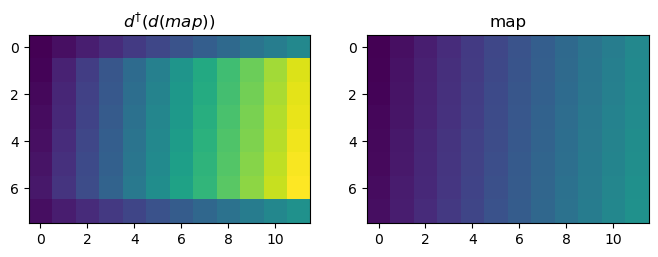

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(map_und[0], vmin=np.min(synth1D), vmax=np.max(map_und[0]))
ax[0].set_title(r"$d^{\dagger}\left(d(map)\right)$")
ax[1].imshow(synth1D_py, vmin=np.min(synth1D), vmax=np.max(map_und[0]))
ax[1].set_title(r"map")

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

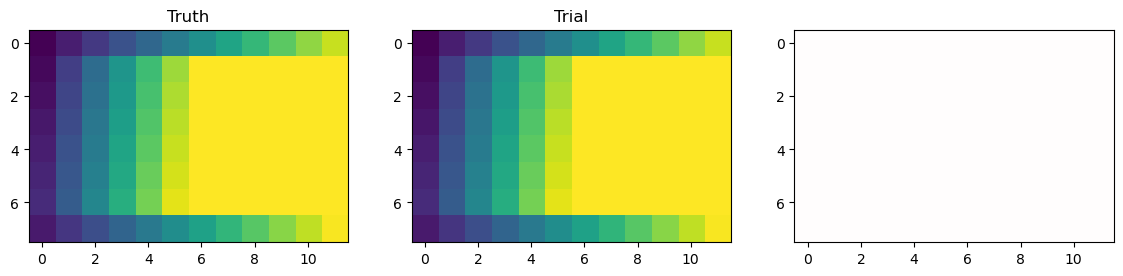

In [5]:
import numpy as np
import matplotlib.pyplot as plt
synth1D_cu = np.arange((ntheta * nphi))
synth1D_cu[:] = doubling1D_py.flatten()[:ntheta*nphi]
doubling1D = np.copy(doubling1D_py.flatten())

nphihalf = nphi // 2
npix = ntheta * nphi
npixplusnphihalf = 2*(ntheta-2)*nphi + nphihalf
for ringi in range(1,ntheta-1):
    doubleringi = (ntheta-1 + (ringi))%ntheta
    for phii in range(0, nphi):
        if phii<nphihalf:
            synth1D_cu[ringi * nphi + phii] += doubling1D[npixplusnphihalf - (doubleringi-1)*nphi + phii]
        else:
            synth1D_cu[ringi * nphi + phii] += doubling1D[npixplusnphihalf - (doubleringi)*nphi + phii]

fig, ax = plt.subplots(1,3,figsize=(14,6))
ax[0].imshow(map_und[0], vmin=0, vmax=npix)
ax[0].set_title('Truth')
ax[1].imshow(synth1D_cu.reshape(ntheta, nphi), vmin=0, vmax=npix)
ax[1].set_title("Trial")
ax[2].imshow(map_und[0]-synth1D_cu.reshape(ntheta, nphi), cmap="seismic", vmin=-10, vmax=10)

((map_und[0]) - (synth1D_cu.reshape(ntheta, nphi))).astype(int)

# adjoint doubling - contiguous